In [24]:
import torch
import matplotlib.pyplot as plt

In [25]:
def f(x, y):
    return 3.0 * x * x + 4.0 * y * y + x * y -x + 2.0 * y + 1.0 

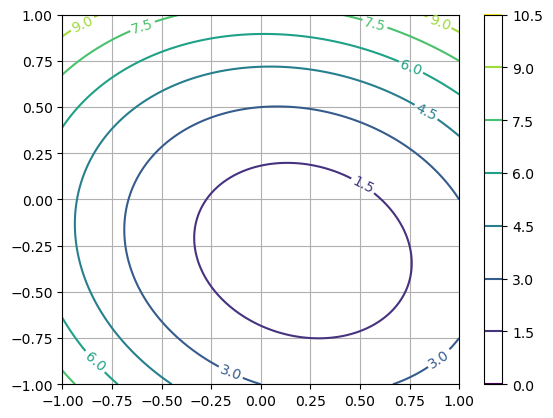

In [26]:
import torch
import matplotlib.pyplot as plt

def f(x, y):
    return 3.0 * x * x + 4.0 * y * y + x * y -x + 2.0 * y + 1.0 

x = torch.linspace(-1.0, 1.0, 100)
y = torch.linspace(-1.0, 1.0, 100)
X, Y = torch.meshgrid(x, y, indexing="xy")

Z = f(X, Y)
cs = plt.contour(X, Y, Z)
plt.gca().clabel(cs, inline=True, fontsize=10)
plt.colorbar()
plt.grid(True)

In [27]:
def grad_f(x, y):
    z = f(x, y)
    z.backward()
    return [x.grad.item(), y.grad.item()]

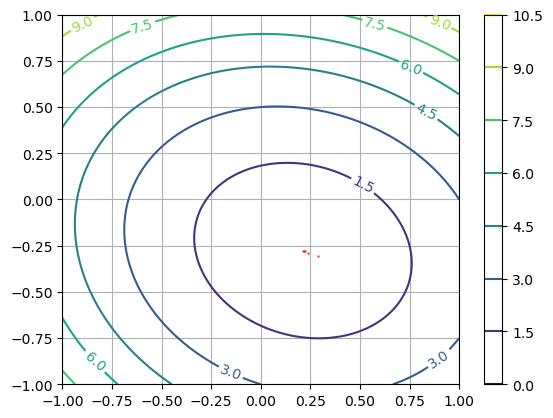

In [41]:
Z = f(X, Y)
cs = plt.contour(X, Y, Z)
plt.gca().clabel(cs, inline=True, fontsize=10)
plt.colorbar()
plt.grid(True)

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
lr = 0.11884652534268048

for i in range(5):
    gx, gy = grad_f(x, y)
    x = torch.tensor(x.item() - lr * gx, requires_grad=True)
    y = torch.tensor(y.item() - lr * gy, requires_grad=True)
    plt.plot(x.item(), y.item(), "r.", ms=1.0, alpha=1.0)

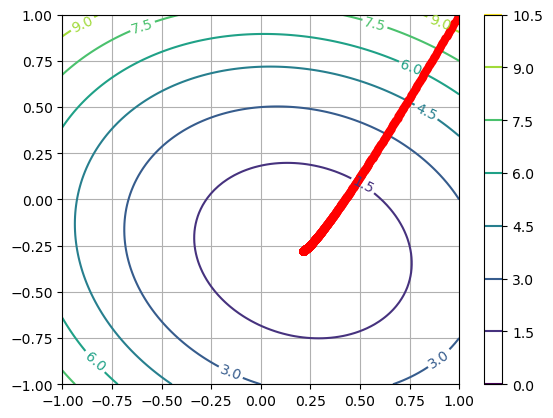

In [19]:
Z = f(X, Y)
cs = plt.contour(X, Y, Z)
plt.gca().clabel(cs, inline=True, fontsize=10)
plt.colorbar()
plt.grid(True)

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
lr = 1e-3

optimizer = torch.optim.SGD(params = [x, y], lr=lr)

for i in range(1000):
    z = f(x, y)
    z.backward()
    optimizer.step()
    plt.plot(x.item(), y.item(), "r.", ms=10.0)
    optimizer.zero_grad()

-0.4220000207424164 -1.6069999933242798
0.7959429621696472 1.0658860206604004
-0.3515028953552246 -1.6176724433898926
0.7687225937843323 1.0587408542633057
-0.33832260966300964 -1.6048190593719482
0.7601142525672913 1.0441004037857056
-0.33122003078460693 -1.5896610021591187
0.7535244822502136 1.028835415840149
-0.3248212933540344 -1.574421763420105
0.7472125887870789 1.0136643648147583
-0.3185621201992035 -1.5593326091766357
0.7409949898719788 0.9986611604690552
-0.31238269805908203 -1.544416069984436
0.7348520755767822 0.983831524848938
-0.30627575516700745 -1.5296732187271118
0.7287809252738953 0.9691745042800903
-0.3002398610115051 -1.515101671218872
0.7227802872657776 0.9546878933906555
-0.2942742705345154 -1.5006991624832153
0.7168493866920471 0.9403694868087769
-0.288377970457077 -1.4864643812179565
0.7109875082969666 0.9262178540229797
-0.28255027532577515 -1.4723953008651733
0.7051939368247986 0.9122305512428284
-0.27679044008255005 -1.4584895372390747
0.6994675993919373 0.898

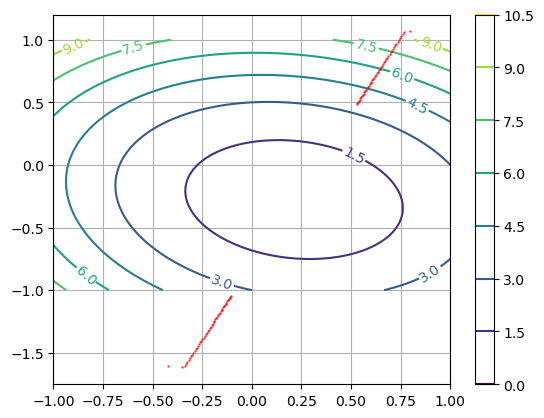

In [22]:
Z = f(X, Y)
cs = plt.contour(X, Y, Z)
plt.gca().clabel(cs, inline=True, fontsize=10)
plt.colorbar()
plt.grid(True)

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
lr = 0.237

optimizer = torch.optim.SGD(params = [x, y], lr=lr)

for i in range(100):
    z = f(x, y)
    z.backward()
    optimizer.step()
    plt.plot(x.item(), y.item(), "r.", ms=1.0)
    print(x.item(), y.item())
    optimizer.zero_grad()

In [23]:
A = torch.tensor([
    [3.0, 0.5], 
    [0.5, 4.0]
])

In [13]:
torch.linalg.eigh(A)

torch.return_types.linalg_eigh(
eigenvalues=tensor([2.7929, 4.2071]),
eigenvectors=tensor([[-0.9239,  0.3827],
        [ 0.3827,  0.9239]]))

In [14]:
lambdas, P = torch.linalg.eigh(A)

In [15]:
D = torch.diag(lambdas)
D

tensor([[2.7929, 0.0000],
        [0.0000, 4.2071]])

In [16]:
P @ D @ P.T

tensor([[3.0000, 0.5000],
        [0.5000, 4.0000]])

In [17]:
lambda_1, lambda_2 = lambdas

In [18]:
lr = 0.5 / lambda_2.item()
lr

0.11884652534268048

In [21]:
lr_lim = 1.0 / lambda_2.item()
lr_lim

0.23769305068536095

In [34]:
best_lr = 1.0 / (lambda_1 + lambda_2)
best_lr

tensor(0.1429)

In [35]:
lambda_2 / lambda_1

tensor(1.5064)

In [38]:
k = torch.linalg.cond(A)
k

tensor(1.5064)

In [40]:
n_dix = 1.0 / torch.log10(k / (k-1))
n_dix

tensor(2.1121)